In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargue y visualice las imágenes de trabajo.

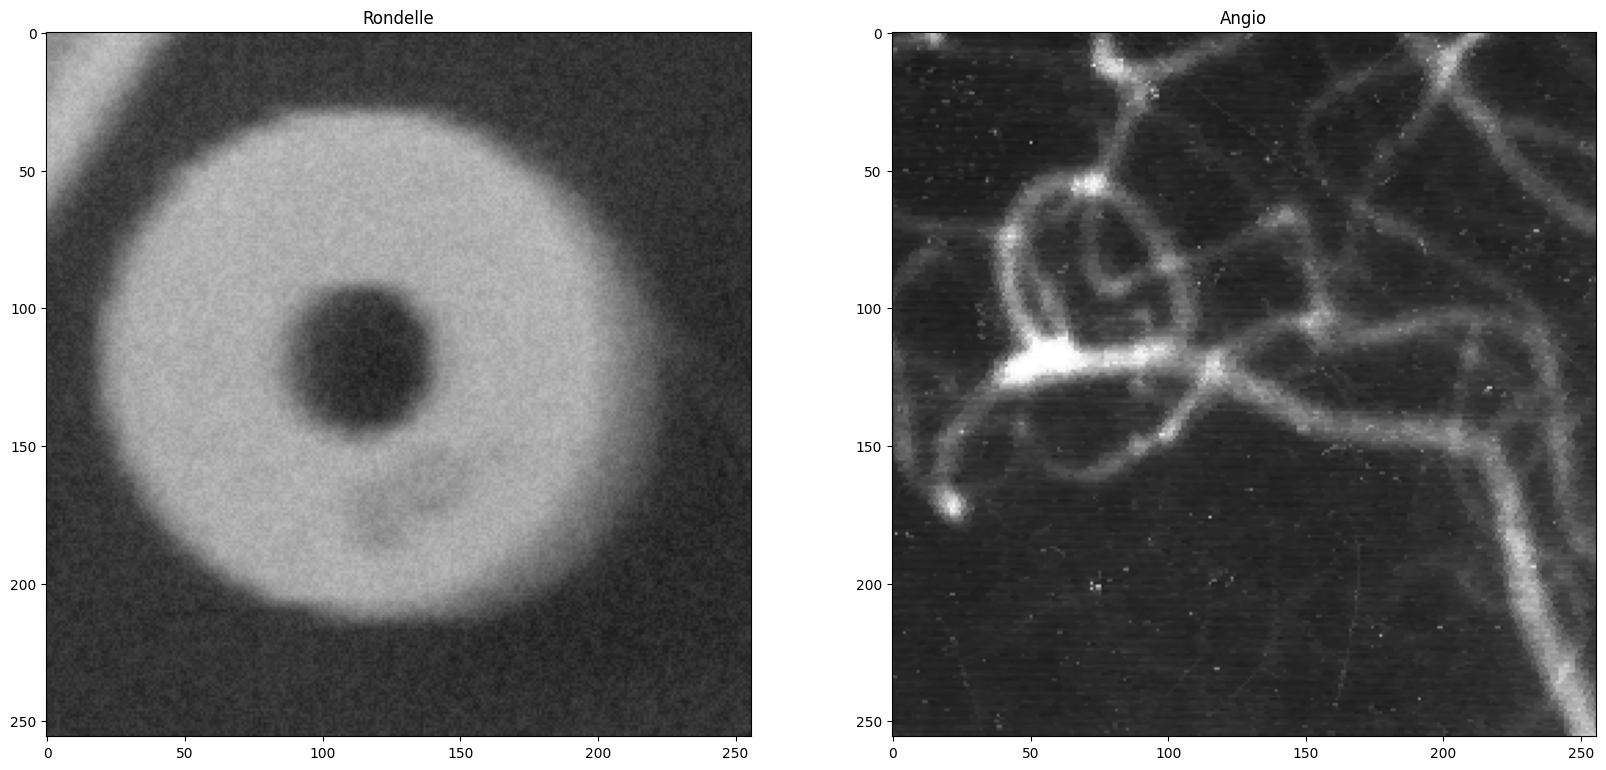

In [20]:
rondelle = cv2.imread("./images/rondelle.png")
angio = cv2.imread("./images/angio.png")

fig, axes = plt.subplots(1,2, figsize = (20,15)) 
axes[0].imshow(rondelle, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Rondelle')
axes[1].imshow(angio, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Angio')

plt.show()

# Se desea aplicar una umbralización doble de tal manera que la imagen resultante debe contener tres clases, cuyos niveles de gris son 0, 128 y 255 respectivamente. Para esto debe utilizar las funciones de umbralización simple y umbralización doble.

# Aplique esta umbralización doble sobre las imágenes de trabajo rondelle.png y angio.png, utilizando como umbrales bajo y alto los valores 70 y 140 respectivamente. Visualice el resultado.

In [21]:
def umbralizacion_doble_0_128_255(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    new_img = img.copy()
    thres_image1 = cv2.inRange(img, 70, 140)
    thres_value, thres_image2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    for i in range(len(new_img)):
        for j in range(len(new_img[i])):
            if thres_image1[i][j] == 255:
                new_img[i][j] = 128
    for i in range(len(new_img)):
        for j in range(len(new_img[i])):
            if new_img[i][j] == 128:
                continue
            elif thres_image2[i][j] == 255:
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
    return new_img



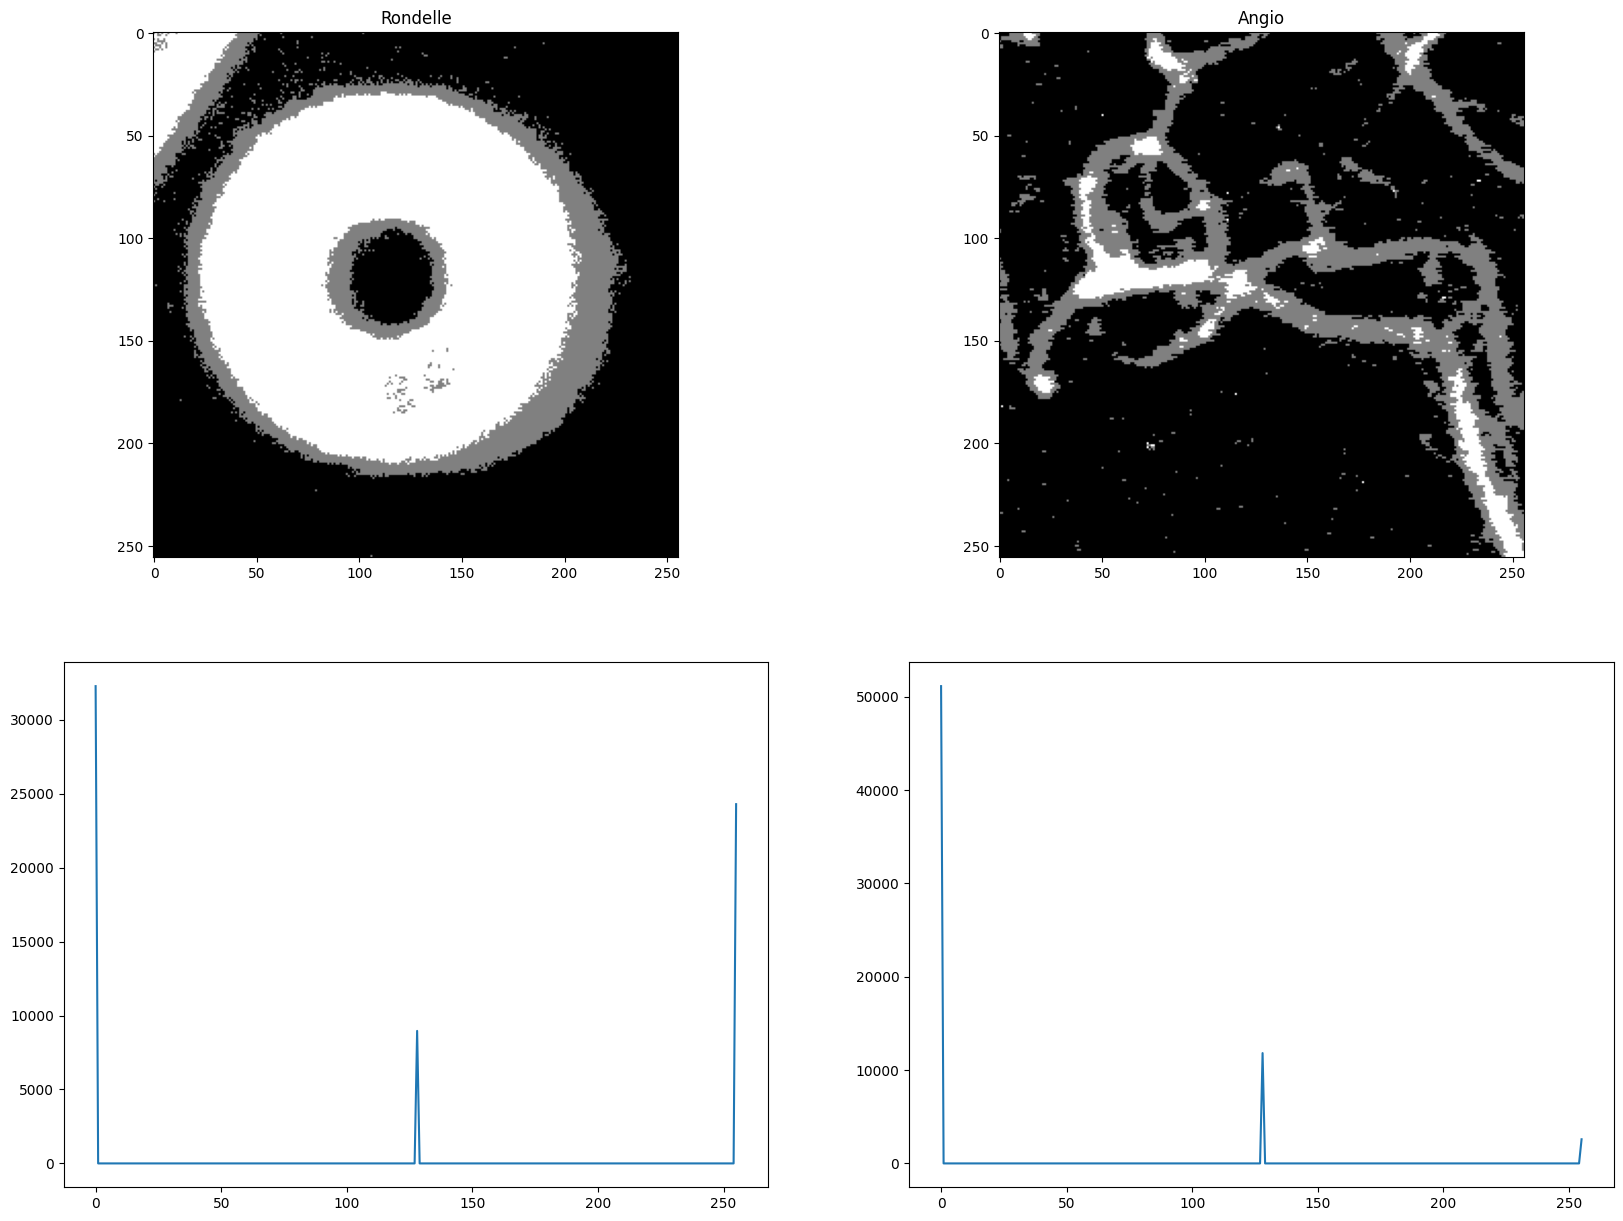

In [22]:
fig, axes = plt.subplots(2,2, figsize = (20,15)) 
axes[0][0].imshow(umbralizacion_doble_0_128_255(rondelle), cmap= 'gray', vmin = 0, vmax= 255)
axes[0][0].set_title('Rondelle')
axes[0][1].imshow(umbralizacion_doble_0_128_255(angio), cmap= 'gray', vmin = 0, vmax= 255)
axes[0][1].set_title('Angio')


axes[1][0].plot(cv2.calcHist([umbralizacion_doble_0_128_255(rondelle)],[0],None,[256],[0,256]))
axes[1][1].plot(cv2.calcHist([umbralizacion_doble_0_128_255(angio)],[0],None,[256],[0,256]))

plt.show()